In [6]:
from modules import utils
import pandas as pd
import datetime

In [2]:
DATA_PATH = 'data/tweets/'
week_list = utils.load_week_list(DATA_PATH)
len(week_list)

26

In [3]:
print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
# hashtag groups
neutral_hashtags = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19']
agt_cpi_hashtags = ['renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente']
pro_cpi_hashtags = ['forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']
selected_hashtags = neutral_hashtags+agt_cpi_hashtags+pro_cpi_hashtags
print(selected_hashtags)

['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']


In [7]:
neutral_count = []
anti_cpi_count = []
anti_gov_count = []

for week in week_list:
    print(f'Starting {week}')
    n_counter = 0
    ac_counter = 0
    ag_counter = 0
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        user = eval(tweet['user'])
        hashtags = eval(tweet['hashtags'])
        #if hashtags and not set(selected_hashtags).isdisjoint(hashtags):
        #    split_tts.append([user['username'], user['description'], tweet['content'], hashtags])
        if hashtags:
            for hashtag in hashtags:
                hashtag_lower = hashtag.lower()
                if hashtag_lower in selected_hashtags:
                    if hashtag_lower in neutral_hashtags:
                        n_counter += 1
                    elif hashtag_lower in agt_cpi_hashtags:
                        ac_counter += 1
                    elif hashtag_lower in pro_cpi_hashtags:
                        ag_counter += 1
    neutral_count.append(n_counter)
    anti_cpi_count.append(ac_counter)
    anti_gov_count.append(ag_counter)

Starting week_01
Starting week_02
Starting week_03
Starting week_04
Starting week_05
Starting week_06
Starting week_07
Starting week_08
Starting week_09
Starting week_10
Starting week_11
Starting week_12
Starting week_pr_01
Starting week_pr_02
Starting week_13
Starting week_14
Starting week_15
Starting week_16
Starting week_17
Starting week_pr_03
Starting week_18
Starting week_19
Starting week_20
Starting week_21
Starting week_pr_04
Starting week_22


In [15]:
df = pd.DataFrame(columns=['neutral', 'anti_cpi', 'anti_gov'], data=zip(neutral_count, anti_cpi_count, anti_gov_count))
df.shape

(26, 3)

In [16]:
df.head()

,neutral,anti_cpi,anti_gov
0,7455,52727,18734
1,26152,19370,29385
2,52601,81361,31181
3,88692,14045,35149
4,49817,12280,80093


<AxesSubplot:title={'center':'Hashtag groups distribution'}, xlabel='week numbers', ylabel='hashtag using counter'>

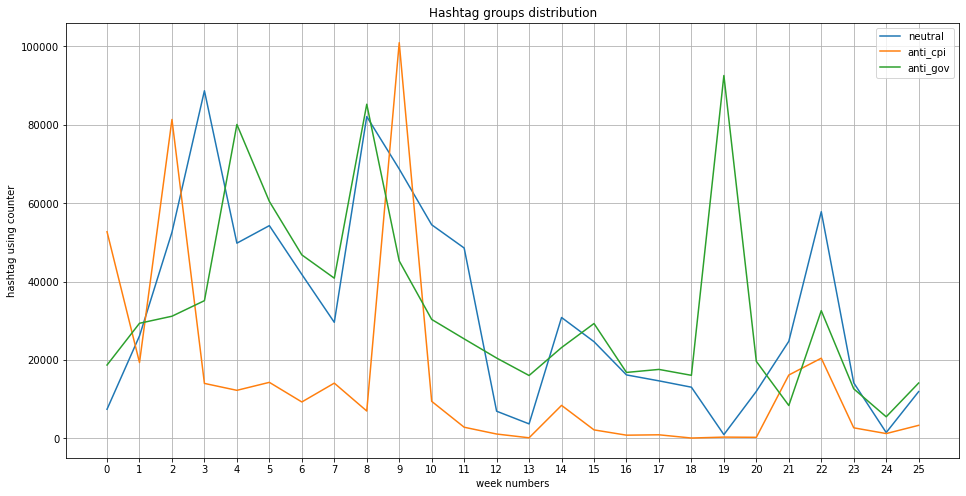

In [33]:
df.plot(
    title='Hashtag groups distribution',
    figsize=(16,8),
    grid=True,
    xlabel='week numbers',
    ylabel='hashtag using counter',
    xticks=[n for n in range(0, 26)]
)